In [1]:
# Step 1 - Write some markdown to explain that this notebook will be mainly used for the capstone project.

### This notebook was created as a requirement of the Applied Data Science Capstone peer graded assignment 

Print the following the statement: Hello Capstone Project Course!

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


# IBM Capstone - PART 1

##### NOTE: Parts 2 and 3 of this exercise can be found further down. Please scroll for more information

Instructions
----
For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.

Start by creating a new Notebook for this assignment.
Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:


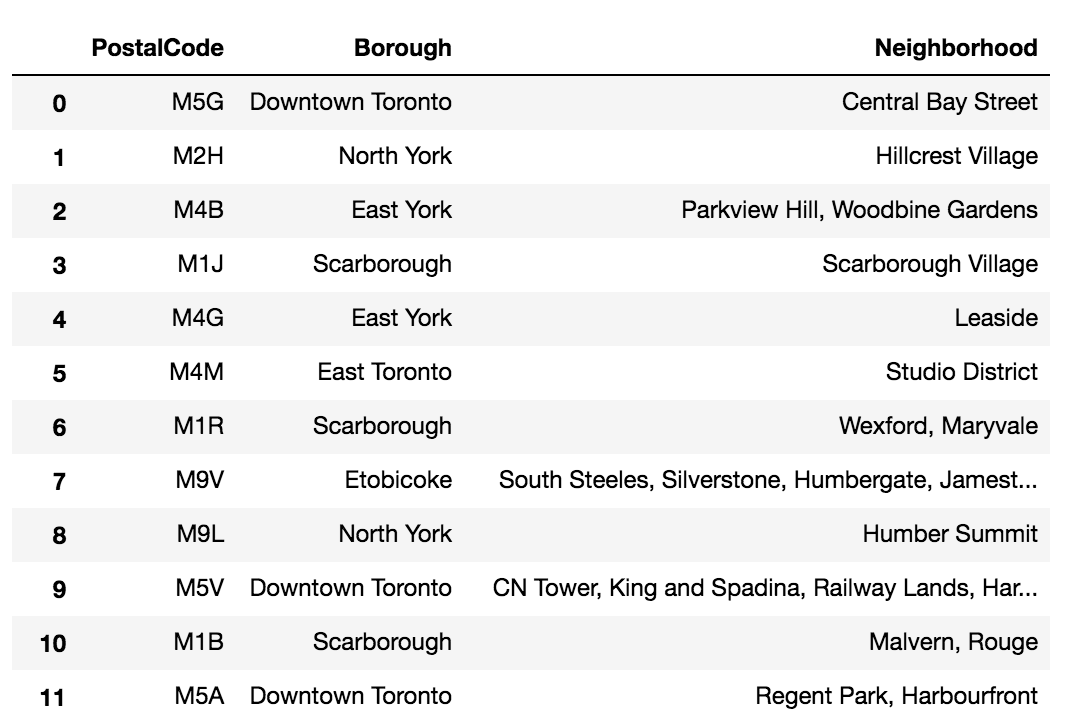

To create the above dataframe:

The dataframe will consist of three columns: 

#### PostalCode, Borough, and Neighborhood


Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.

Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

Use pandas, or the BeautifulSoup package, or any other way you are comfortable with to transform the data in the table on the Wikipedia page into the above pandas dataframe.

The following resources were used:

BeautifulSoup docs: http://beautiful-soup-4.readthedocs.io/en/latest/ 

BeautifulSoup YouTube: https://www.youtube.com/watch?v=ng2o98k983k

RealPython: https://realpython.com/beautiful-soup-web-scraper-python/

FreecodeCamp: https://www.freecodecamp.org/news/how-to-scrape-websites-with-python-and-beautifulsoup-5946935d93fe/

Towards Data Science: https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059

### Import the required libraries 

In [3]:
# Import html and libs for handling page requests
import requests
import lxml.html as html
print("I now know HTML...")

I now know HTML...


In [4]:
# Import dataframes and related libs
import pandas as pd # Note: will be using pandas instead of the beatifulsoup package
from pandas.io.json import json_normalize # Note: read a json file and transform it to a pandas dataframe
print("I now know PANDAS...")
print("I now know JSON...")

I now know PANDAS...
I now know JSON...


In [5]:
# Import python libs for number manipulations
import numpy as np
import random # library for random number generation
print("I now know math...")

I now know math...


In [6]:
# Display images
from IPython.display import Image 
from IPython.core.display import HTML 
print("I now know how to display images in python...")

I now know how to display images in python...


In [7]:
# Convert coords for a specific address
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

# the following 2 lines are only needed if using a GIS lib from Google (or other location service providers)
#!conda install -c conda-forge geocoder --yes
#import geocoder # import geocoder

print("I now know how to find an address...")

Solving environment: ...working... done

# All requested packages already installed.

I now know how to find an address...


In [59]:
# Plot analysis
!conda install -c conda-forge folium=0.5.0 --yes
import folium

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

print("I now know how to visualize data...")

Solving environment: ...working... done

# All requested packages already installed.

I now know how to visualize data...


In [9]:
# Load clustering algos
from sklearn.cluster import KMeans

### Create a URL and a PAGE object

In [10]:
# create URL
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

# Create a page handle
toronto_FSA_page = requests.get(url)
toronto_FSA_page

<Response [200]>

### Read the PAGE directly from the URL created above

In [11]:
# Store the contents of the website under doc
toronto_html_doc = html.fromstring(toronto_FSA_page.content)
toronto_html_doc

<Element html at 0x19e5db65d68>

### Get Column Headers and Store Them

In [12]:
toronto_html_elements = toronto_html_doc.xpath('//tr')

#Create empty list
col_name = []
index = 0

# For each row, store each first element (header) and an empty list
for row in toronto_html_elements[0]:
    index = index + 1
    #print(index)
    html_name = row.text_content()
    #print(html_name)
    col_name.append((html_name, []))
    
print("The column names are: ", col_name) # note: neighborhood has a newline character that needs to be removed

The column names are:  [('Postcode', []), ('Borough', []), ('Neighborhood\n', [])]


### Create the PANDAS datafraame

In [13]:
# Note: The header is the first row. Actual data starts in the second row.
for row_index in range(1,len(toronto_html_elements)):
    row = toronto_html_elements[row_index]
    
    # Ignore all elements that should not be in the table 
    if len(row) != 3:
        #print(row)
        break
    
    #i is the index of our column
    col_index = 0
    
    #Iterate through each element of the row
    for row_elem in row.iterchildren():
        row_data = row_elem.text_content() 
        
        if col_index > 0: # note: if the row has non-numerical data, it must be ignored
            try:
                row_data = int(row_data)
            except:
                pass
            
        # Add the "good" row of data to the table created before
        col_name[col_index][1].append(row_data)
        
        col_index = col_index + 1

### Check if the data was loaded correctly

In [14]:
#col_name # note: for debugging purposes, to see if all data was added to the table

In [15]:
d = {title:column for (title,column) in col_name}
toronto_nei_df = pd.DataFrame(d)
toronto_nei_df

,Postcode,Borough,Neighborhood\n
0,M1A,Not assigned,Not assigned\n
1,M2A,Not assigned,Not assigned\n
2,M3A,North York,Parkwoods\n
3,M4A,North York,Victoria Village\n
4,M5A,Downtown Toronto,Harbourfront\n
...,...,...,...
282,M8Z,Etobicoke,Mimico NW\n
283,M8Z,Etobicoke,The Queensway West\n
284,M8Z,Etobicoke,Royal York South West\n
285,M8Z,Etobicoke,South of Bloor\n


###### NOTE: The neighborhood column has newline characters that need to be removed

In [16]:
# display the first 10 rows
#toronto_nei_df.head(10)

### Remove extra characters from NEI column

In [17]:
toronto_nei_df = toronto_nei_df.replace('\n',' ', regex=True)
toronto_nei_df.head()

,Postcode,Borough,Neighborhood\n
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


### Remove "pesky" '\n' in the NEI column

In [18]:
toronto_nei_df.columns = ['Postcode', 'Borough','Neighborhood']

new_cols = toronto_nei_df.columns.tolist()
new_cols

['Postcode', 'Borough', 'Neighborhood']

In [19]:
toronto_nei_df.head()

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


### Remove rows with Borough = Not Assigned
###### Instructions: Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [20]:
toronto_nei_df.drop(toronto_nei_df.index[toronto_nei_df['Borough'] == 'Not assigned'], inplace = True)
toronto_nei_df = toronto_nei_df.reset_index(drop = True)
toronto_nei_df.head()

,Postcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor


### Combine NEIs with similar Postcode and Borough
###### Instructions: More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma

In [21]:
toronto_nei_df = toronto_nei_df.groupby(['Postcode', 'Borough'])['Neighborhood'].apply(','.join).reset_index()
toronto_nei_df.head()

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge ,Malvern"
1,M1C,Scarborough,"Highland Creek ,Rouge Hill ,Port Union"
2,M1E,Scarborough,"Guildwood ,Morningside ,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


### If NEI is not assigned then use the value of Borough
###### Instructions: if a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.

In [22]:
# Check NEI for Queen's Park
toronto_nei_df[toronto_nei_df['Borough'] == 'Queen\'s Park']

,Postcode,Borough,Neighborhood
93,M9A,Queen's Park,Not assigned


###### Note: As expected the NEI for Queen's Park Borough is not assigned

In [23]:
# Note: although is barely visible, there are trailing spaces in some of the NEIs. These need to be removed to make a proper comparison next
toronto_nei_df['Neighborhood'] = toronto_nei_df['Neighborhood'].str.strip()
toronto_nei_df

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge ,Malvern"
1,M1C,Scarborough,"Highland Creek ,Rouge Hill ,Port Union"
2,M1E,Scarborough,"Guildwood ,Morningside ,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village ,Martin Grove Gardens ,Richv..."
101,M9V,Etobicoke,"Albion Gardens ,Beaumond Heights ,Humbergate ,..."


In [24]:
# assign the borough to NEI where the value is not assigned
toronto_nei_df.loc[toronto_nei_df['Neighborhood'] == 'Not assigned', 'Neighborhood'] = toronto_nei_df['Borough']
toronto_nei_df

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge ,Malvern"
1,M1C,Scarborough,"Highland Creek ,Rouge Hill ,Port Union"
2,M1E,Scarborough,"Guildwood ,Morningside ,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village ,Martin Grove Gardens ,Richv..."
101,M9V,Etobicoke,"Albion Gardens ,Beaumond Heights ,Humbergate ,..."


In [25]:
# Check NEI = Queen's Park again
toronto_nei_df[toronto_nei_df['Borough'] == 'Queen\'s Park']

,Postcode,Borough,Neighborhood
93,M9A,Queen's Park,Queen's Park


### Find the Shape of the Dataframe
###### Instructions: In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [26]:
toronto_nei_df.shape

(103, 3)

### -----------------------------------------------------------------------------------------------------------------------------------

# IBM Capstone - PART 2

Instructions
----
Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. 

Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

Use the Geocoder package or the csv file to create the following dataframe

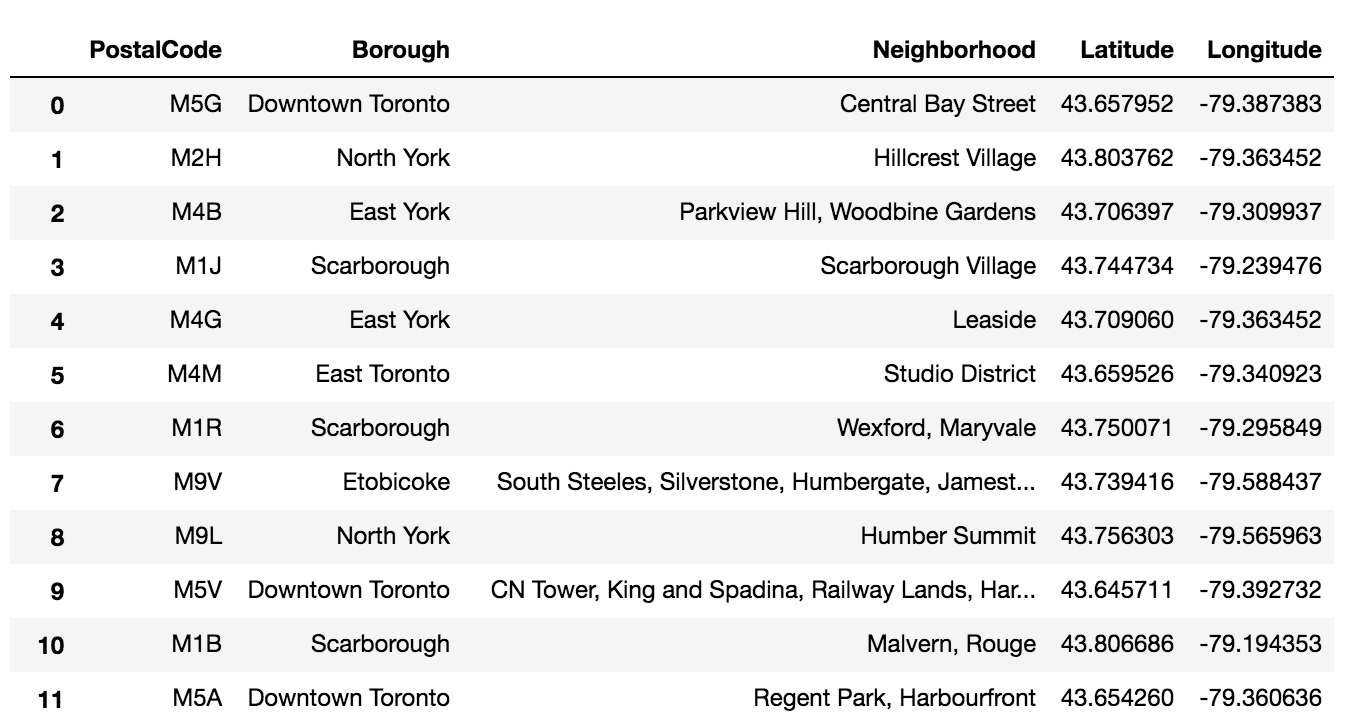

Important Note: There is a limit on how many times you can call geocoder.google function. It is 2500 times per day. This should be way more than enough for you to get acquainted with the package and to use it to get the geographical coordinates of the neighborhoods in the Toronto

### Load GIS data from .CSV
###### Instructions: here is a link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

In [27]:
geo_url = "http://cocl.us/Geospatial_data"
geo_data = pd.read_csv(geo_url)

# write the geo data to a local env.
geo_data.to_csv(r'geo_data.csv')

geo_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [28]:
# Note: both data frames should have the same shape
print("Toronto NEI df = ", toronto_nei_df.shape)
print("Geo Data df = ", geo_data.shape)

Toronto NEI df =  (103, 3)
Geo Data df =  (103, 3)


### Merge data using 'Postcode' as primary key
###### Note: the geo data uses a column name 'Postal Code'. This column needs to be "converted"

In [29]:
# Convert the Postal Code colulmn to PostCode
geo_data.columns = ['Postcode','Latitude','Longitude']

geo_data_cols = geo_data.columns.tolist()
geo_data_cols

['Postcode', 'Latitude', 'Longitude']

In [30]:
toronto_nei_w_geo_df = pd.merge(toronto_nei_df, geo_data, on='Postcode')
toronto_nei_w_geo_df

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge ,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek ,Rouge Hill ,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood ,Morningside ,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village ,Martin Grove Gardens ,Richv...",43.688905,-79.554724
101,M9V,Etobicoke,"Albion Gardens ,Beaumond Heights ,Humbergate ,...",43.739416,-79.588437


### Write the Toronto NEI information with GEO data to a local env

In [31]:
# write the geo data to a local env.
toronto_nei_w_geo_df.to_csv(r'toronto_nei_w_geo.csv')

### -----------------------------------------------------------------------------------------------------------------------------------

# IBM Capstone - PART 3

### Instructions

Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you.

Just make sure:
- to add enough Markdown cells to explain what you decided to do and to report any observations you make.
- to generate maps to visualize your neighborhoods and how they cluster together.

In [32]:
# Note: the location for clustering will be Toronto and its NEIs
cluster_loc = 'Toronto, Canada'

gis = Nominatim(user_agent="can_explorer")
loc = gis.geocode(cluster_loc)
lat = loc.latitude
long = loc.longitude
print('{} is located at {}, {}.'.format(cluster_loc, lat, long))

Toronto, Canada is located at 43.653963, -79.387207.


In [33]:
# create map of Toronto using latitude and longitude values
toronto_nei_map = folium.Map(location=[lat, long], zoom_start=12)

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [lat, long],
    radius=10,
    color='red',
    popup='Casa Loma', # this is really cool historic building in Toronto I always wanted to visit
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(toronto_nei_map)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_nei_w_geo_df['Latitude'], toronto_nei_w_geo_df['Longitude'], toronto_nei_w_geo_df['Borough'], toronto_nei_w_geo_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        parse_html=False
    ).add_to(toronto_nei_map)  
    
toronto_nei_map

In [34]:
CLIENT_ID = '1XKGK5ZVWRKSIZGJCE1ECR0IIBYGPPO24TW4DBSYMREN5STU' # your Foursquare ID
CLIENT_SECRET = '5APXAJH5LASLTJV04O0UWPVLGQBCEZA3KXEY5KVZLTDZJE4J' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: 1XKGK5ZVWRKSIZGJCE1ECR0IIBYGPPO24TW4DBSYMREN5STU
CLIENT_SECRET:5APXAJH5LASLTJV04O0UWPVLGQBCEZA3KXEY5KVZLTDZJE4J


### Explore Toronto NEIs

In [35]:
toronto_nei_w_geo_df

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge ,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek ,Rouge Hill ,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood ,Morningside ,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village ,Martin Grove Gardens ,Richv...",43.688905,-79.554724
101,M9V,Etobicoke,"Albion Gardens ,Beaumond Heights ,Humbergate ,...",43.739416,-79.588437


### Explore NEI in Toronto's data where Casa Loma is located

In [36]:
# Note: after the map was created and the location Casa Loma was pinpointed in the map, it was easy(ier) to find the correct NEI. 
# It could've been done differently, without a map
bool_loc = (toronto_nei_w_geo_df.loc[:,'Neighborhood'] == 'Davisville').tolist()
bool_idx = bool_loc.index(True)
casa_loma_nei_id = toronto_nei_w_geo_df.loc[bool_idx, 'Neighborhood']

print("The NEI of Casa Loma is", casa_loma_nei_id)
print("The NEI index in the dataframe of Casa Loma is", bool_idx)

The NEI of Casa Loma is Davisville
The NEI index in the dataframe of Casa Loma is 47


### Get the neighborhood's latitude and longitude values.

In [37]:
casa_loma_latitude = toronto_nei_w_geo_df.loc[bool_idx, 'Latitude'] # neighborhood latitude value
casa_loma_longitude = toronto_nei_w_geo_df.loc[bool_idx, 'Longitude'] # neighborhood longitude value

casa_loma_name = toronto_nei_w_geo_df.loc[bool_idx, 'Neighborhood'] # neighborhood name

print('{} is located at {}, {}.'.format(casa_loma_name, 
                                                               casa_loma_latitude, 
                                                               casa_loma_longitude))

Davisville is located at 43.7043244, -79.3887901.


### Get the top 100 venues that are in Casa Loma within a radius of 500 meters

In [38]:
# Note: create a url using Foursquare API
radius = 500
LIMIT = 100
casa_loma_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET, 
    casa_loma_latitude, 
    casa_loma_longitude, 
    VERSION, 
    radius, 
    LIMIT)
casa_loma_url

'https://api.foursquare.com/v2/venues/explore?client_id=1XKGK5ZVWRKSIZGJCE1ECR0IIBYGPPO24TW4DBSYMREN5STU&client_secret=5APXAJH5LASLTJV04O0UWPVLGQBCEZA3KXEY5KVZLTDZJE4J&ll=43.7043244,-79.3887901&v=20180604&radius=500&limit=100'

In [39]:
casa_loma_results = requests.get(casa_loma_url).json()
casa_loma_results

{'meta': {'code': 200, 'requestId': '5e1dd0063907e70022fba5d8'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Davisville',
  'headerFullLocation': 'Davisville, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 33,
  'suggestedBounds': {'ne': {'lat': 43.7088244045, 'lng': -79.38257691798016},
   'sw': {'lat': 43.699824395499995, 'lng': -79.39500328201983}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ae6ea6ef964a52082a721e3',
       'name': 'Jules Cafe Patisserie',
       'location': {'address': '617 Mt Pleasant Ave',
        'crossStreet': 'at Manor Rd E',
        'lat': 43.70413799694304,
        'lng': -79.38841260442167,
        'labeledLatLngs':

### Create a function to get Categories from the items key

In [40]:
# Note: this function was adapted from the labs for IBM Data Science Captsone project labs
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Clean up the JSON data and get only relevant data, ie, close to Casa Loma

In [41]:
venues = casa_loma_results['response']['groups'][0]['items']

# venues nearby Casa Loma
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

print("Here's a few interesting ones arount Casa Loma")
nearby_venues.head()

33 venues were returned by Foursquare.
Here's a few interesting ones arount Casa Loma


,name,categories,lat,lng
0,Jules Cafe Patisserie,Dessert Shop,43.704138,-79.388413
1,Thobors Boulangerie Patisserie Café,Café,43.704514,-79.388616
2,XO Gelato,Dessert Shop,43.705177,-79.388793
3,Marigold Indian Bistro,Indian Restaurant,43.702881,-79.388008
4,Viva Napoli,Pizza Place,43.705752,-79.389125


### I'm interested in finding a good Dessert place around Casa Loma

In [42]:
print("Show me some dessert places in the same NEI as Casa Loma")
nearby_venues.loc[nearby_venues['categories'].isin(['Dessert Shop'])]

Show me some dessert places in the same NEI as Casa Loma


,name,categories,lat,lng
0,Jules Cafe Patisserie,Dessert Shop,43.704138,-79.388413
2,XO Gelato,Dessert Shop,43.705177,-79.388793
11,Flaky Tart,Dessert Shop,43.706539,-79.389611


## Further explore NEIs in Toronto

### Create a function to analyze all NEIs in Toronto (similar to the process above)

In [43]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Call function above on ALL Toronto NEIs

In [44]:
toronto_nei_venues = getNearbyVenues(names=toronto_nei_w_geo_df['Neighborhood'],
                                   latitudes=toronto_nei_w_geo_df['Latitude'],
                                   longitudes=toronto_nei_w_geo_df['Longitude']
                                  )

Rouge ,Malvern
Highland Creek ,Rouge Hill ,Port Union
Guildwood ,Morningside ,West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park ,Ionview ,Kennedy Park
Clairlea ,Golden Mile ,Oakridge
Cliffcrest ,Cliffside ,Scarborough Village West
Birch Cliff ,Cliffside West
Dorset Park ,Scarborough Town Centre ,Wexford Heights
Maryvale ,Wexford
Agincourt
Clarks Corners ,Sullivan ,Tam O'Shanter
Agincourt North ,L'Amoreaux East ,Milliken ,Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview ,Henry Farm ,Oriole
Bayview Village
Silver Hills ,York Mills
Newtonbrook ,Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park ,Don Mills South
Bathurst Manor ,Downsview North ,Wilson Heights
Northwood Park ,York University
CFB Toronto ,Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens ,Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West ,

In [45]:
# Look at the shape of data for all venues in all NEIs
print(toronto_nei_venues.shape)
toronto_nei_venues.head()

(2209, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge ,Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Highland Creek ,Rouge Hill ,Port Union",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Guildwood ,Morningside ,West Hill",43.763573,-79.188711,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,Pizza Place
3,"Guildwood ,Morningside ,West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
4,"Guildwood ,Morningside ,West Hill",43.763573,-79.188711,Marina Spa,43.766000,-79.191000,Spa


In [46]:
# group NEIs
toronto_nei_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide ,King ,Richmond",100,100,100,100,100,100
Agincourt,5,5,5,5,5,5
"Agincourt North ,L'Amoreaux East ,Milliken ,Steeles East",2,2,2,2,2,2
"Albion Gardens ,Beaumond Heights ,Humbergate ,Jamestown ,Mount Olive ,Silverstone ,South Steeles ,Thistletown",9,9,9,9,9,9
"Alderwood ,Long Branch",9,9,9,9,9,9
...,...,...,...,...,...,...
Willowdale West,6,6,6,6,6,6
Woburn,4,4,4,4,4,4
"Woodbine Gardens ,Parkview Hill",11,11,11,11,11,11


### How many unique categories can be found from all the returned venues

In [47]:
print('There are {} uniques categories.'.format(len(toronto_nei_venues['Venue Category'].unique())))

There are 273 uniques categories.


### Analyze each NEI - ONE HOT Analysis

In [48]:
# one hot encoding
toronto_nei_venues_onehot = pd.get_dummies(toronto_nei_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_nei_venues_onehot['Neighborhood'] = toronto_nei_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_nei_venues_onehot.columns[-1]] + list(toronto_nei_venues_onehot.columns[:-1])
toronto_nei_venues_onehot = toronto_nei_venues_onehot[fixed_columns]

toronto_nei_venues_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
toronto_nei_venues_onehot.shape

(2209, 273)

### Group rows by neighborhood and take the mean of the frequency of occurrences of each category

In [50]:
toronto_nei_venues_grouped = toronto_nei_venues_onehot.groupby('Neighborhood').mean().reset_index()
toronto_nei_venues_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,"Adelaide ,King ,Richmond",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.02,0.0,0.000000,0.0,0.0,0.01,0.0,0.0,0.01
1,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.00
2,"Agincourt North ,L'Amoreaux East ,Milliken ,St...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.00
3,"Albion Gardens ,Beaumond Heights ,Humbergate ,...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.111111,0.0,0.0,0.00,0.0,0.0,0.00
4,"Alderwood ,Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Willowdale West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.00
95,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.00
96,"Woodbine Gardens ,Parkview Hill",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.00
97,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.111111,0.0,0.0,0.00,0.0,0.0,0.00


In [51]:
# check the shape of the new dataframe
toronto_nei_venues_grouped.shape

(99, 273)

### Print each neighborhood along with the top 5 most common venues

In [52]:
# Note: code adapted from IBM Data Science Captsone project labs 
num_top_venues = 5

for hood in toronto_nei_venues_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_nei_venues_grouped[toronto_nei_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide ,King ,Richmond----
         venue  freq
0  Coffee Shop  0.08
1         Café  0.04
2   Steakhouse  0.04
3          Bar  0.04
4        Hotel  0.03


----Agincourt----
                       venue  freq
0             Breakfast Spot   0.2
1                     Lounge   0.2
2  Latin American Restaurant   0.2
3               Skating Rink   0.2
4             Clothing Store   0.2


----Agincourt North ,L'Amoreaux East ,Milliken ,Steeles East----
                        venue  freq
0                        Park   0.5
1                  Playground   0.5
2                 Yoga Studio   0.0
3                 Men's Store   0.0
4  Modern European Restaurant   0.0


----Albion Gardens ,Beaumond Heights ,Humbergate ,Jamestown ,Mount Olive ,Silverstone ,South Steeles ,Thistletown----
                  venue  freq
0         Grocery Store  0.22
1              Pharmacy  0.11
2  Fast Food Restaurant  0.11
3           Pizza Place  0.11
4        Sandwich Place  0.11


----Alderwood ,Long Branch

### Create a new dataframe for the previous output

In [53]:
# First define a function that sorts the data (descending)
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [54]:
# Note: code adapted from IBM Data Science Capstone project labs
# Second, create a new dataframe to display the top 10 venues in each NEI
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_nei_venues_grouped['Neighborhood']

for ind in np.arange(toronto_nei_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_nei_venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide ,King ,Richmond",Coffee Shop,Steakhouse,Bar,Café,Burger Joint,Asian Restaurant,Hotel,Thai Restaurant,Sushi Restaurant,Restaurant
1,Agincourt,Lounge,Latin American Restaurant,Breakfast Spot,Skating Rink,Clothing Store,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore
2,"Agincourt North ,L'Amoreaux East ,Milliken ,St...",Park,Playground,Dumpling Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
3,"Albion Gardens ,Beaumond Heights ,Humbergate ,...",Grocery Store,Fast Food Restaurant,Pharmacy,Video Store,Pizza Place,Fried Chicken Joint,Beer Store,Sandwich Place,Women's Store,Donut Shop
4,"Alderwood ,Long Branch",Pizza Place,Skating Rink,Gym,Coffee Shop,Pharmacy,Athletics & Sports,Pub,Sandwich Place,Women's Store,Doner Restaurant


### Begin the CLUSTERING Process using k-means

In [55]:
# set number of clusters
kclusters = 5

toronto_nei_venues_grouped_clustering = toronto_nei_venues_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_nei_venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0])

### Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [56]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_nei_w_geo_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Rouge ,Malvern",43.806686,-79.194353,1.0,Fast Food Restaurant,Women's Store,Eastern European Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store
1,M1C,Scarborough,"Highland Creek ,Rouge Hill ,Port Union",43.784535,-79.160497,4.0,Bar,Women's Store,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Field
2,M1E,Scarborough,"Guildwood ,Morningside ,West Hill",43.763573,-79.188711,0.0,Medical Center,Breakfast Spot,Spa,Rental Car Location,Mexican Restaurant,Pizza Place,Electronics Store,Intersection,Women's Store,Dog Run
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0.0,Coffee Shop,Korean Restaurant,Insurance Office,Women's Store,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.0,Caribbean Restaurant,Bakery,Athletics & Sports,Fried Chicken Joint,Thai Restaurant,Gas Station,Bank,Hakka Restaurant,Electronics Store,Eastern European Restaurant


### Visualize clusters

In [74]:
# create map
toronto_map_clusters = folium.Map(location=[lat, long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color="#007849", 
        fill=True,
        fill_color="#00849",
        fill_opacity=0.5).add_to(toronto_map_clusters)
       
toronto_map_clusters

### Examine Clusters

In [86]:
# Cluster 1
k1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
k1

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Scarborough,0.0,Medical Center,Breakfast Spot,Spa,Rental Car Location,Mexican Restaurant,Pizza Place,Electronics Store,Intersection,Women's Store,Dog Run
3,Scarborough,0.0,Coffee Shop,Korean Restaurant,Insurance Office,Women's Store,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
4,Scarborough,0.0,Caribbean Restaurant,Bakery,Athletics & Sports,Fried Chicken Joint,Thai Restaurant,Gas Station,Bank,Hakka Restaurant,Electronics Store,Eastern European Restaurant
5,Scarborough,0.0,Grocery Store,Playground,Women's Store,Dumpling Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore
6,Scarborough,0.0,Discount Store,Department Store,Coffee Shop,Hobby Shop,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...
96,North York,0.0,Pizza Place,Empanada Restaurant,Women's Store,Dumpling Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Electronics Store
99,Etobicoke,0.0,Pizza Place,Middle Eastern Restaurant,Sandwich Place,Intersection,Coffee Shop,Chinese Restaurant,Women's Store,Donut Shop,Dog Run,Doner Restaurant
100,Etobicoke,0.0,Mobile Phone Shop,Pizza Place,Sandwich Place,Bus Line,Donut Shop,Diner,Discount Store,Dog Run,Doner Restaurant,Women's Store
101,Etobicoke,0.0,Grocery Store,Fast Food Restaurant,Pharmacy,Video Store,Pizza Place,Fried Chicken Joint,Beer Store,Sandwich Place,Women's Store,Donut Shop


In [87]:
# Cluster 2
k2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
k2

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Scarborough,1.0,Fast Food Restaurant,Women's Store,Eastern European Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store


In [88]:
# Cluster 3
k3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
k3

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Scarborough,2.0,Park,Playground,Dumpling Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
23,North York,2.0,Park,Bank,Convenience Store,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store
25,North York,2.0,Food & Drink Shop,Park,Women's Store,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant
30,North York,2.0,Park,Airport,Eastern European Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store
40,East York,2.0,Park,Convenience Store,Women's Store,Eastern European Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
48,Central Toronto,2.0,Park,Tennis Court,Playground,Drugstore,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant
50,Downtown Toronto,2.0,Park,Trail,Playground,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
74,York,2.0,Park,Fast Food Restaurant,Market,Women's Store,Greek Restaurant,Gourmet Shop,Event Space,Gym,Ethiopian Restaurant,Empanada Restaurant
90,Etobicoke,2.0,River,Smoke Shop,Park,Comfort Food Restaurant,Comic Shop,Falafel Restaurant,Event Space,Ethiopian Restaurant,Colombian Restaurant,Empanada Restaurant
98,York,2.0,Park,Convenience Store,Women's Store,Eastern European Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant


In [89]:
# Cluster 4
k4 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
k4

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
91,Etobicoke,3.0,Baseball Field,Women's Store,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Field
97,North York,3.0,Construction & Landscaping,Baseball Field,Women's Store,Electronics Store,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant


In [90]:
# Cluster 5
k5 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
k5

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Scarborough,4.0,Bar,Women's Store,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Field


In [91]:
print("k1 shape = ",k1.shape)
print("k2 shape = ",k2.shape)
print("k3 shape = ",k3.shape)
print("k4 shape = ",k4.shape)
print("k5 shape = ",k5.shape)

k1 shape =  (86, 12)
k2 shape =  (1, 12)
k3 shape =  (10, 12)
k4 shape =  (2, 12)
k5 shape =  (1, 12)


### Conclusion: Cluster K1 and K3 are the largest with 86 and 10 Boroughs, respectively. K2, K4 and K5 are small clusters with 1 or 2 Boroughs.